# Assignment 1 - Artificial Intelligence techniques

Take three images of a hand in each of the three lighting conditions (indoor, outdoor and shadow). Use `cvCalcHist()` to make an RGB histogram of the flesh color of one of the hands photographed indoors.

Firstly, load the libraries.

In [20]:
# Import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt

print("OpenCV version:", cv2.__version__)

OpenCV version: 4.6.0


Load the images.

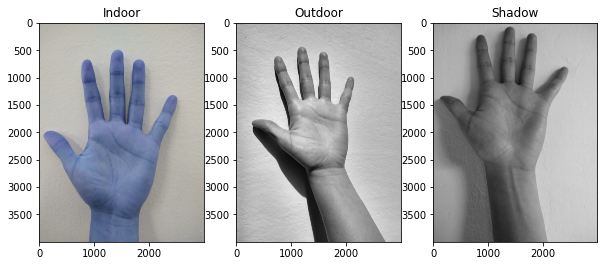

In [25]:
# Code for use the notebook from google colab
# from google.colab import drive
# drive.mount('/content/gdrive')

# %cd /content/gdrive/.shortcut-targets-by-id/<folder-id>


indoor = cv2.imread('Img\indoor.jpg')
outdoor = cv2.imread('Img\outdoor.jpg')
shadow = cv2.imread('Img\shadow.jpg')

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Indoor')
plt.imshow(indoor)

plt.subplot(1, 3, 2)
plt.title('Outdoor')
plt.imshow(outdoor, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Shadow')
plt.imshow(shadow, cmap='gray')

plt.show()

2. Now, calculate the histogram.


In [22]:
# 	cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) ->	hist
ind_his = cv2.calcHist(indoor, [0], None, [256], [0, 256])

<BarContainer object of 256 artists>

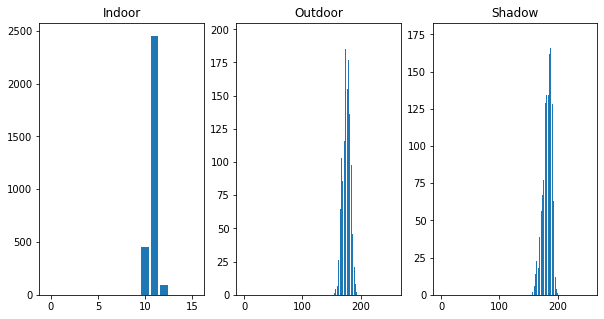

In [23]:
# 	cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) ->	hist
ind_his = cv2.calcHist(indoor, [0], None, [16], [0, 256])
out_his = cv2.calcHist(outdoor, [0], None, [256], [0, 256])
sha_his = cv2.calcHist(shadow, [0], None, [256], [0, 256])

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title('Indoor')
plt.bar(range(16), ind_his.flatten())

plt.subplot(1, 3, 2)
plt.title('Outdoor')
plt.bar(range(256), out_his.flatten())

plt.subplot(1, 3, 3)
plt.title('Shadow')
plt.bar(range(256), sha_his.flatten())
